# Energy consumption of training Stable Diffusion
Author: Mathilde Jay    
Date: 01/08/2023

### Summary
- Analysis of energy consumed
- Analysis of power timeseries
    - by components
    - in total
- Analysis of ML stats

The results were first processed using the script "process_results.py" : 
It needs to be run on g5k (to get powermeter logs).
```
python utils/process_results.py --analysis_git_dir "/home/mjay/ai-energy-consumption-framework" --result_folder "/home/mjay/laion/pokemon/training_13_09_sirius"
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Description of results

In [25]:
files = [
    # "/Users/mathildepro/Documents/code_projects/stable_diffusion_logs/training_6_09_sirius/",
    # "/Users/mathildepro/Documents/code_projects/stable_diffusion_logs/training_11_09_sirius/",
    # "/Users/mathildepro/Documents/code_projects/stable_diffusion_logs/training_13_09_sirius/",
    # "/Users/mathildepro/Documents/code_projects/stable_diffusion_logs/training_27_09_sirius/",
    "/Users/mathildepro/Documents/code_projects/stable_diffusion_logs/training_4_09_gemini/",
    
]
pm = pd.DataFrame()
exp_table = pd.DataFrame()
for f in files:
    table = pd.read_csv(f+"processed_table.csv")
    exp_table = pd.concat([exp_table, table])   
    table_wattmetre = pd.read_csv(f+"g5k_metrics.csv")
    pm = pd.concat([pm, table_wattmetre], ignore_index=True)
cols = [x for x in exp_table.columns if "tool" not in x and "id" not in x and "dir" not in x]
exp_table[cols].T

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
experiment_start,1693846818.612458,1693847180.980296,1693847532.163852,1693847883.622602,1693848234.795422,1693848586.135459,1693848937.318712,1693849288.594411,1693849639.646331,1693849990.711232,...,1693884471.642333,1693884982.849228,1693885494.158534,1693886000.322483,1693886506.542075,1693887022.900039,1693887534.260923,1693888040.476334,1693888546.723031,1693889053.032023
experiment_end,1693847177.923965,1693847529.273498,1693847880.49182,1693848231.925325,1693848583.234241,1693848934.457896,1693849285.650748,1693849636.791636,1693849987.847858,1693850344.018867,...,1693884979.927733,1693885491.223512,1693885997.449247,1693886503.606426,1693887019.921379,1693887531.372402,1693888037.535903,1693888543.854693,1693889050.053153,1693889556.386876
period,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
execution_script_args.sleep_before,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
execution_script_args.sleep_after,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
execution_script_args.benchmark_execution,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...,accelerate launch /home/mjay/ai-energy-consump...
execution_script_template,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...,/home/mjay/ai-energy-consumption-framework//ut...
execution_script_path,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/hom

In [26]:
exp_table.nunique()[(exp_table.nunique() < 99)&(exp_table.nunique() > 1)]

pretrained_model_name_or_path    2
resolution                       2
seed                             5
model_version                    2
dtype: int64

In [27]:
import math
def compute_steps(row):
    update_per_epoch = math.ceil(row["max_train_samples"]/(row["gradient_accumulation_steps"]*row["train_batch_size"]*row["gpu_count"]))
    return row["num_train_epochs"]*update_per_epoch

exp_table["num_steps"] = exp_table.apply(compute_steps, axis=1)

In [29]:
parameter_selection = {
    "max_train_samples":600,
    "num_train_epochs":15,
    "resolution":512,
    "num_steps": 150,
    # "model_version":"v1-1",
    # "seed":42,
}

exp_table.groupby([col for col in parameter_selection.keys()]).count()

experiment_start  \
max_train_samples num_train_epochs resolution num_steps                     
600.0             15.0             256        150.0                    49   
                                   512        150.0                    50   

                                                         experiment_end  \
max_train_samples num_train_epochs resolution num_steps                   
600.0             15.0             256        150.0                  49   
                                   512        150.0                  50   

                                                         tool_csv_file_nvml  \
max_train_samples num_train_epochs resolution num_steps                       
600.0             15.0             256        150.0                      49   
                                   512        150.0                      50   

                                                         tool_csv_file_rapl  \
max_train_samples num_train_epochs resolution num_steps                       
600.0             15.0             256        150.0                      49   
                                   512        150.0                      50   

                                                         tool_csv_file_sysinfo  \
max_train_samples num_train_epochs resolution num_steps                          
600.0             15.0             256        150.0                         49   
                                   512        150.0                         50   

                                                         tool_energy_consumption(kWh)  \
max_train_samples num_train_epochs resolution num_steps                                 
600.0             15.0             256        150.0                                49   
                                   512        150.0                                50   

                                                         tool_GPU_energy_consumption(kWh)  \
max_train_samples num_train_epochs resolution num_steps                                     
600.0             15.0             256        150.0                                    49   
                                   512        150.0                                    50   

                                                         tool_CPU_energy_consumption(kWh)  \
max_train_samples num_train_epochs resolution num_steps                                     
600.0             15.0             256        150.0                                    49   
                                   512        150.0                                    50   

                                                         tool_RAM_energy_consumption(kWh)  \
max_train_samples num_train_epochs resolution num_steps                                     
600.0             15.0             256        150.0                                    49   
                                   512        150.0                                    50   

                                                         tool_GPU_utilization(percent)  \
max_train_samples num_train_epochs resolution num_steps                                  
600.0             15.0             256        150.0                                 49   
                                   512        150.0                                 50   

                                                         ...  \
max_train_samples num_train_epochs resolution num_steps  ...   
600.0             15.0             256        150.0      ...   
                                   512        150.0      ...   

                                                         dataloader_num_workers  \
max_train_samples num_train_epochs resolution num_steps                           
600.0             15.0             256        150.0                          49   
                                   512        150.0                          50   

                                                         

In [30]:
selected_df=exp_table.copy()
for col in parameter_selection.keys():
    value = parameter_selection[col]
    selected_df = selected_df[selected_df[col]==value]
selected_df.T #[["model_version"]]

,24,25,26,27,28,29,30,31,32,33,...,89,90,91,92,93,94,95,96,97,98
experiment_start,1693855281.530446,1693855797.935194,1693856309.123091,1693856815.403471,1693857321.735846,1693857832.974585,1693858339.276261,1693858845.539791,1693859351.624018,1693859862.855836,...,1693884471.642333,1693884982.849228,1693885494.158534,1693886000.322483,1693886506.542075,1693887022.900039,1693887534.260923,1693888040.476334,1693888546.723031,1693889053.032023
experiment_end,1693855794.911183,1693856306.239676,1693856812.441604,1693857318.814332,1693857830.05949,1693858336.337519,1693858842.627572,1693859348.729789,1693859859.849622,1693860366.269235,...,1693884979.927733,1693885491.223512,1693885997.449247,1693886503.606426,1693887019.921379,1693887531.372402,1693888037.535903,1693888543.854693,1693889050.053153,1693889556.386876
tool_csv_file_nvml,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...
tool_csv_file_rapl,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...
tool_csv_file_sysinfo,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...,/home/mjay/laion/pokemon/training_4_09_gemini/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sensor_gpu0_exp_

In [31]:
energy_df = pd.DataFrame()
for f in files:
    energy = pd.read_csv(f+"timeseries.csv")
    energy["exp_table_path"]=f+"processed_table.csv"
    energy_df = pd.concat([energy_df, energy], ignore_index=True)
del energy

/var/folders/yq/7v824pz907x0d1tjqclbqmn80000gn/T/ipykernel_27690/1873164029.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  energy = pd.read_csv(f+"timeseries.csv")


In [32]:
energy_df.describe()

,timestamp,device_index,energy_consumption_since_previous_measurement_milliJ,instantaneous_power_milliW,global_utilization_percent,global_memory_percent,timestamp(sec),timestamp_origin(sec),socket,utilization_percent,exp_table_index,power(W),energy_consumption_since_previous_measurement(kWh)
count,7.218328e+06,626992.00000,940488.000000,626992.000000,626992.000000,626992.000000,7.218328e+06,7.218328e+06,313496.000000,6.277840e+06,7.218328e+06,940488.000000,940488.000000
mean,1.693868e+12,3.50000,47701.881979,113542.901433,42.346995,19.643632,1.693868e+09,2.209843e+02,0.500000,6.286887e+00,5.109583e+01,95.403764,0.000013
std,1.234179e+07,2.29129,41713.516982,77956.325556,46.609249,26.142308,1.234179e+04,1.369560e+02,0.500001,1.751669e+01,2.851748e+01,83.427034,0.000012
min,1.693847e+12,0.00000,6107.360840,43975.000000,0.000000,0.000000,1.693847e+09,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,12.214722,0.000002
25%,1.693857e+12,1.75000,22801.000000,45421.000000,0.000000,0.000000,1.693857e+09,1.029740e+02,0.000000,0.000000e+00,2.800000e+01,45.602000,0.000006
50%,1.693868e+12,3.50000,24013.000000,70963.000000,0.000000,0.000000,1.693868e+09,2.138590e+02,0.500000,0.000000e+00,4.900000e+01,48.026000,0.000007
75%,1.693879e+12,5.25000,101123.000000,182746.000000,95.000000,37.000000,1.693879e+09,3.223580e+02,1.000000,0.000000e+00,7.700000e+01,202.246000,0.000028
max,1.693890e+12,7.00000,162325.000000,323842.000000,100.000000,100.000000,1.693890e+09,5.128770e+02,1.000000,1.000000e+02,9.800000e+01,324.650000,0.000045


In [33]:
energy_df["domain"].unique()

array([nan, 'Package', 'Dram'], dtype=object)

#### Code for components

93.91352201257861


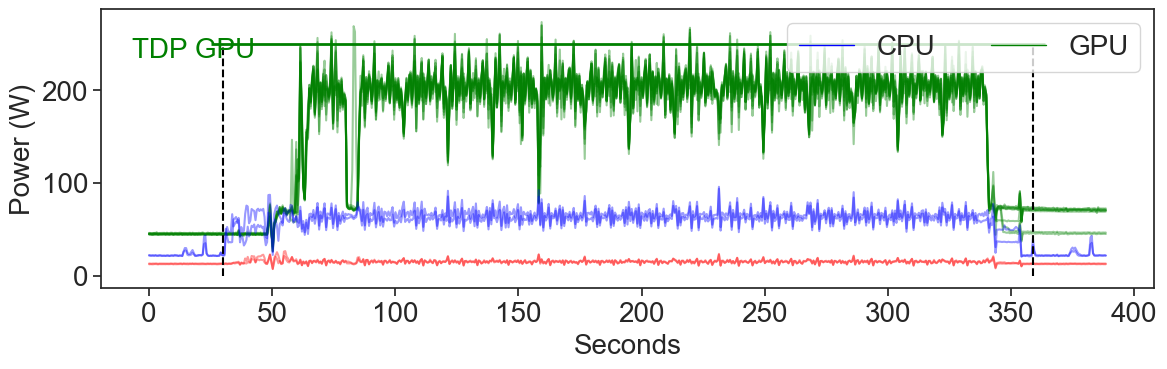

In [34]:
energy_col = "power(W)"
timestamp_col="timestamp(sec)"
legend_fontsize = 20
tdp = 250
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
index = selected_df.index[1]

lib_df = energy_df[energy_df["exp_table_index"]==index]
diff_df = lib_df.groupby("timestamp(sec)").first().reset_index()[["timestamp(sec)"]].diff()
diff_df.rename(columns={"timestamp(sec)":"diff"}, inplace=True)
diff_df["timestamp(sec)"] = lib_df.groupby("timestamp(sec)").first().reset_index()[["timestamp(sec)"]]
lib_df = lib_df.merge(diff_df, on="timestamp(sec)")
lib_df["power(W)"]=lib_df["energy_consumption_since_previous_measurement_milliJ"]*10**(-3)/lib_df["diff"]  

bench_start = selected_df.loc[index, 'bench_start(sec)']
bench_end = selected_df.loc[index, 'bench_end(sec)']
marge = 30

print(lib_df[(lib_df["timestamp(sec)"]>bench_start+30)&(lib_df["timestamp(sec)"]<bench_end-30)]["global_utilization_percent"].mean())

lib_df = lib_df[(lib_df["timestamp(sec)"]>bench_start-marge)&(lib_df["timestamp(sec)"]<bench_end+marge)]

lib_df["Seconds"] = lib_df["timestamp(sec)"]-lib_df["timestamp(sec)"].min()


for label, df in lib_df.groupby(["device_index"]):
    df.plot(
        x="Seconds", 
        y=energy_col, 
        ax=ax, 
        # label="GPU "+str(int(label[0])),
        color="green",
        alpha=0.4,
        fontsize=legend_fontsize,
        )
    
ax.hlines(
    y=tdp, 
    xmin=marge - 5, 
    xmax=selected_df.loc[index, 'bench_end(sec)'] - selected_df.loc[index, 'bench_start(sec)'] + marge + 5,
    color="green",
    linewidth=2,
    # marker="-",
    )
for label, df in lib_df[lib_df["domain"]=="Package"].groupby(["domain", "socket"]):
     df.plot(
        x="Seconds", 
        y=energy_col, 
        ax=ax, 
        # label="CPU "+ str(int(label[1])),
        color="blue",
        fontsize=legend_fontsize,
        alpha=0.4,
        )
     
for label, df in lib_df[lib_df["domain"]=="Dram"].groupby(["domain", "socket"]):
     df.plot(
        x="Seconds", 
        y=energy_col, 
        ax=ax, 
        # label="CPU "+ str(int(label[1])),
        color="red",
        fontsize=legend_fontsize,
        alpha=0.4,
        )
ax.set_xlabel("Seconds", fontsize=legend_fontsize)
ax.set_ylabel("Power (W)", fontsize=legend_fontsize)

lines = []
labels = []
from matplotlib.lines import Line2D

lines.append(Line2D([0], [0],
            color="blue",
            linewidth=1,
            ))
labels.append("CPU")
# lines.append(Line2D([0], [0],
#             color="red",
#             linewidth=1,
#             ))
# labels.append("RAM")
lines.append(Line2D([0], [0],
            color="green",
            linewidth=1,
            ))
labels.append("GPU")

ax.legend(
    lines,
    labels,
    bbox_to_anchor=(1,1), 
    loc='upper right',
    fontsize=legend_fontsize,
    ncol=3
)

# ax.set_title(index)

bench_start = marge
bench_end = selected_df.loc[index, 'bench_end(sec)'] - selected_df.loc[index, 'bench_start(sec)'] + marge
ax.vlines(
        x=bench_start, 
        ymin=0, 
        ymax=tdp,
        color="black",
        linestyles="dashed",
    #     marker="- -",
        )
ax.vlines(
        x=bench_end, 
        ymin=0, 
        ymax=tdp,
        color="black",
        linestyles="dashed",
    #     marker="- -",
        )
ax.text(
    -7, 
    tdp -15, 
    "TDP GPU", 
    fontsize=legend_fontsize,
    color="green",
    )
plt.tight_layout()

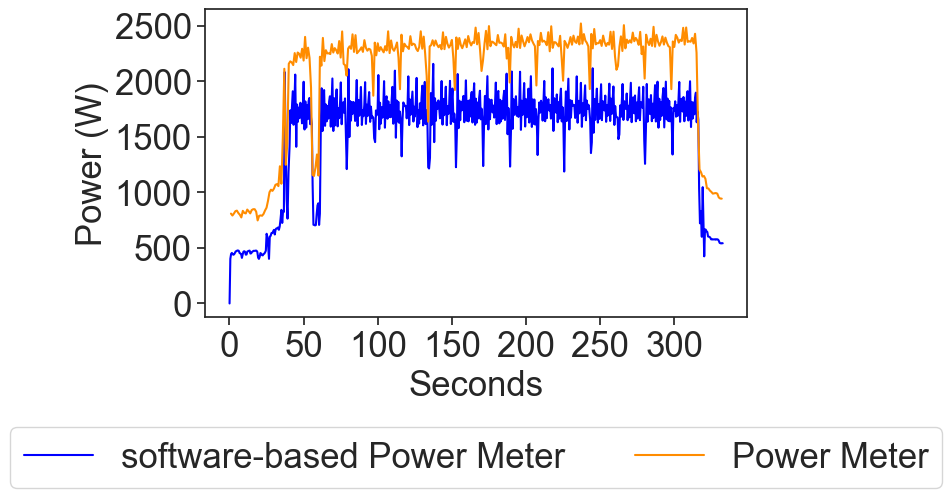

In [35]:
energy_col = "power(W)"
timestamp_col="timestamp_origin(sec)"
FONTSIZE = 25

fig, ax = plt.subplots(figsize=(7,4))
i=0
index = selected_df.index[i]
plot_df = energy_df[energy_df["exp_table_index"]==index]
lib_df = plot_df[(plot_df["device_index"].notna())|(plot_df["domain"]=="Package")]
lib_df = lib_df[
    (lib_df["timestamp(sec)"]>selected_df.loc[index, "bench_start(sec)"])&(lib_df["timestamp(sec)"]<selected_df.loc[index, "bench_end(sec)"])
    ]
diff_df = lib_df.groupby("timestamp(sec)").first().reset_index()[["timestamp(sec)"]].diff()
diff_df.rename(columns={"timestamp(sec)":"diff"}, inplace=True)
diff_df["timestamp(sec)"] = lib_df.groupby("timestamp(sec)").first().reset_index()[["timestamp(sec)"]]
lib_df = lib_df.merge(diff_df, on="timestamp(sec)")
lib_df["power(W)"]=lib_df["energy_consumption_since_previous_measurement_milliJ"]*10**(-3)/lib_df["diff"]   
lib_df[timestamp_col] = lib_df["timestamp(sec)"]-selected_df.loc[index, "bench_start(sec)"]
lib_df.groupby([timestamp_col]).sum().plot(
    y=energy_col, 
    ax=ax, 
    label="software-based Power Meter",
    color="blue",
    fontsize=FONTSIZE,
    )
# print("Sum CPU + GPU software-based power meter:")
# print(lib_df.groupby([timestamp_col]).sum()["energy_consumption_since_previous_measurement(kWh)"].sum())
# print(lib_df.groupby([timestamp_col]).sum()["energy_consumption_since_previous_measurement(kWh)"].describe())
# bench_pm = pm[
#     (pm["timestamp(sec)"]>selected_df.loc[index, "experiment_start(sec)"])&(pm["timestamp(sec)"]<selected_df.loc[index, "experiment_end(sec)"])
#     ].copy()
bench_pm = pm[
    (pm["timestamp(sec)"]>selected_df.loc[index, "bench_start(sec)"])&(pm["timestamp(sec)"]<selected_df.loc[index, "bench_end(sec)"])
    ].copy()
bench_pm[timestamp_col] = bench_pm["timestamp(sec)"]-selected_df.loc[index, "bench_start(sec)"]
bench_pm.plot(
    x=timestamp_col, 
    y="wattmetre_power_watt", 
    ax=ax, 
    label="Power Meter",
    fontsize=FONTSIZE,
    color="darkorange"
    )
# print("Sum power meter:")
# print(bench_pm.sum())
# print(bench_pm.describe())
ax.set_ylabel("Power (W)", fontsize=FONTSIZE)
ax.set_xlabel("Seconds", fontsize=FONTSIZE)
ax.legend(
    bbox_to_anchor=(0.5,-0.3), 
    loc='upper center',
    fontsize=FONTSIZE,
    ncol=2
)
# ax.get_legend().remove()
# ax.set_title("Power of components", fontdict={"fontsize":FONTSIZE})

# tdp_total = tdp*8
# ax.hlines(
#     y=tdp_total, 
#     xmin=-5, 
#     xmax=selected_df.loc[index, 'bench_end(sec)'] - selected_df.loc[index, 'bench_start(sec)'] + 5,
#     color="green",
#     linewidth=2,
#     # marker="-",
#     )
# ax.vlines(
#         x=0, 
#         ymin=0, 
#         ymax=tdp_total,
#         color="black",
#         linestyles="dashed",
#     #     marker="- -",
#         )
# ax.vlines(
#         x=selected_df.loc[index, 'bench_end(sec)'] - selected_df.loc[index, 'bench_start(sec)'], 
#         ymin=0, 
#         ymax=tdp_total,
#         color="black",
#         linestyles="dashed",
#     #     marker="- -",
#         )
# ax.text(
#     -10, 
#     tdp_total+130, 
#     "TDP", 
#     fontsize=15,
#     color="green",
#     )
# ax.text(
#     -10, 
#     tdp_total+20, 
#     "GPUs", 
#     fontsize=15,
#     color="green",
#     )
plt.savefig("/Users/mathildepro/Documents/code_projects/ai-energy-consumption-framework/stable-diffusion/graphs/power_meter_comparison_timeseries_sirius.png", bbox_inches='tight')

In [36]:
lib_df.head()

,timestamp,device_index,energy_consumption_since_previous_measurement_milliJ,instantaneous_power_milliW,global_utilization_percent,global_memory_percent,timestamp(sec),timestamp_origin(sec),domain,socket,cpu,utilization_percent,exp_table_index,power(W),energy_consumption_since_previous_measurement(kWh),exp_table_path,diff
0,1693855371059,0.0,22827.0,44004.0,0.0,0.0,1.693855e+09,0.059,NaN,NaN,NaN,NaN,24,NaN,0.000006,/Users/mathildepro/Documents/code_projects/sta...,NaN
1,1693855371059,1.0,23557.0,45451.0,0.0,0.0,1.693855e+09,0.059,NaN,NaN,NaN,NaN,24,NaN,0.000007,/Users/mathildepro/Documents/code_projects/sta...,NaN
2,1693855371059,2.0,23118.0,44487.0,0.0,0.0,1.693855e+09,0.059,NaN,NaN,NaN,NaN,24,NaN,0.000006,/Users/mathildepro/Documents/code_projects/sta...,NaN
3,1693855371059,3.0,23121.0,44516.0,0.0,0.0,1.693855e+09,0.059,NaN,NaN,NaN,NaN,24,NaN,0.000006,/Users/mathildepro/Documents/code_projects/sta...,NaN
4,1693855371059,4.0,23123.0,44546.0,0.0,0.0,1.693855e+09,0.059,NaN,NaN,NaN,NaN,24,NaN,0.000006,/Users/mathildepro/Documents/code_projects/sta...,NaN


In [37]:
bench_pm.head()
format = "%Y-%m-%d %H:%M:%S"

In [38]:
# "%Y-%m-%dT%H:%M:%S+02:00"
bench_pm = pm.copy()
bench_pm[timestamp_col] = bench_pm["timestamp(sec)"]-selected_df.loc[index, "bench_start(sec)"]

bench_pm = bench_pm.set_index(pd.to_datetime(bench_pm["timestamp(sec)"], unit="s"))[["wattmetre_power_watt"]].reset_index() #.resample("1s").mean()

In [39]:
bench_pm

,timestamp(sec),wattmetre_power_watt
0,2023-09-04 16:58:48,740.284000
1,2023-09-04 16:58:49,772.116000
2,2023-09-04 16:58:50,755.999000
3,2023-09-04 16:58:51,741.066000
4,2023-09-04 16:58:52,741.162000
...,...,...
60120,2023-09-05 04:54:01,615.784848
60121,2023-09-05 04:54:02,612.808000
60122,2023-09-05 04:54:03,611.610000
60123,2023-09-05 04:54:04,611.794000


In [40]:
plot_df = energy_df.copy()
lib_df = plot_df[(plot_df["device_index"].notna())|(plot_df["domain"]=="Package")]
diff_df = lib_df.groupby("timestamp(sec)").first().reset_index()[["timestamp(sec)"]].diff()
diff_df.rename(columns={"timestamp(sec)":"diff"}, inplace=True)
diff_df["timestamp(sec)"] = lib_df.groupby("timestamp(sec)").first().reset_index()[["timestamp(sec)"]]
lib_df = lib_df.merge(diff_df, on="timestamp(sec)")
lib_df["power(W)"]=lib_df["energy_consumption_since_previous_measurement_milliJ"]*10**(-3)/lib_df["diff"]   
lib_df[timestamp_col] = lib_df["timestamp(sec)"]-selected_df.loc[index, "bench_start(sec)"]
lib_df = lib_df.set_index(pd.to_datetime(lib_df["timestamp"], unit="ms"))[["power(W)"]]
lib_df = lib_df.groupby(["timestamp"]).sum().resample("1s").mean().reset_index()
lib_df

,timestamp,power(W)
0,2023-09-04 17:00:19,217.888621
1,2023-09-04 17:00:20,412.928091
2,2023-09-04 17:00:21,396.759817
3,2023-09-04 17:00:22,399.511820
4,2023-09-04 17:00:23,396.372280
...,...,...
42733,2023-09-05 04:52:32,404.379879
42734,2023-09-05 04:52:33,405.144472
42735,2023-09-05 04:52:34,405.408436
42736,2023-09-05 04:52:35,405.787574


In [41]:
lib_df

,timestamp,power(W)
0,2023-09-04 17:00:19,217.888621
1,2023-09-04 17:00:20,412.928091
2,2023-09-04 17:00:21,396.759817
3,2023-09-04 17:00:22,399.511820
4,2023-09-04 17:00:23,396.372280
...,...,...
42733,2023-09-05 04:52:32,404.379879
42734,2023-09-05 04:52:33,405.144472
42735,2023-09-05 04:52:34,405.408436
42736,2023-09-05 04:52:35,405.787574


In [42]:
plot_df = lib_df.merge(bench_pm, left_on="timestamp", right_on="timestamp(sec)").dropna() #.plot(x="timestamp(sec)", y=["power(W)", "wattmetre_power_watt"])

In [43]:
plot_df

,timestamp,power(W),timestamp(sec),wattmetre_power_watt
0,2023-09-04 17:00:19,217.888621,2023-09-04 17:00:19,774.701
1,2023-09-04 17:00:20,412.928091,2023-09-04 17:00:20,755.153
2,2023-09-04 17:00:21,396.759817,2023-09-04 17:00:21,741.394
3,2023-09-04 17:00:22,399.511820,2023-09-04 17:00:22,742.416
4,2023-09-04 17:00:23,396.372280,2023-09-04 17:00:23,742.584
...,...,...,...,...
59940,2023-09-05 04:52:32,404.379879,2023-09-05 04:52:32,749.615
59941,2023-09-05 04:52:33,405.144472,2023-09-05 04:52:33,750.098
59942,2023-09-05 04:52:34,405.408436,2023-09-05 04:52:34,750.812
59943,2023-09-05 04:52:35,405.787574,2023-09-05 04:52:35,749.062


/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/_ol

Regression: External power meter = [1.15345209] x NVML/RAPL + [288.8754534]
Text(0, 0, 'Linear regression\ny = 1.15x + 288.88')


<Figure size 2000x2000 with 0 Axes>

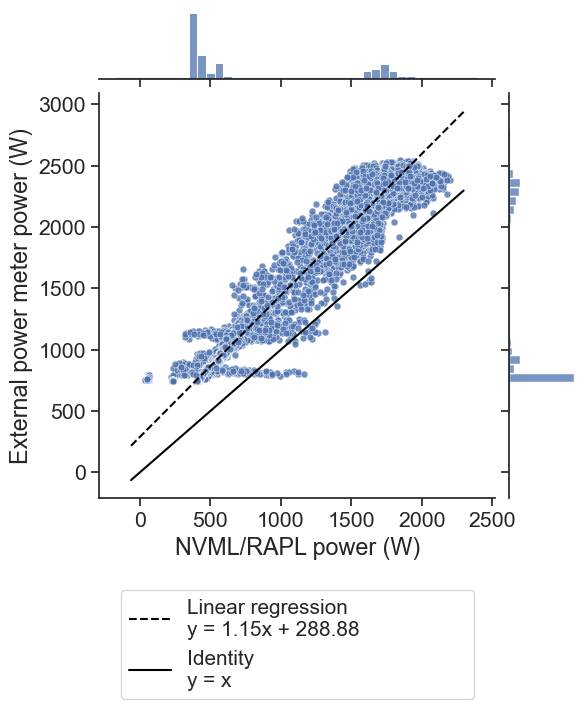

In [46]:
from sklearn import linear_model
import seaborn as sns
X = plot_df[["power(W)"]]
y = plot_df[["wattmetre_power_watt"]]

model = linear_model.LinearRegression()
results = model.fit(X, y)

plt.figure(figsize=(20,20))
sns.set_context("paper")
sns.set(font_scale = 1.4)
sns.set_style("ticks")
grid = sns.jointplot(
    data=plot_df, 
    x="power(W)",
    y="wattmetre_power_watt",
    s=25, alpha=.8
    )
#grid.plot_joint(sns.scatterplot,)
# grid.plot_joint(sns.kdeplot, zorder=0, 
#     #levels=6, thresh=0.0001,
#     levels=[.0001, .0005, .001, .005, .01, .05],
#     )
grid.plot_marginals(sns.kdeplot)
grid.set_axis_labels('{} power (W)'.format("NVML/RAPL"), '{} power (W)'.format("External power meter")) #, fontsize=16)

the_x = plot_df["power(W)"].sort_values().values
the_x = np.concatenate([np.array([the_x[0]-100]),the_x, np.array([the_x[-1]+100])])
the_y = the_x #+ results.intercept_ #the_x - 452
the_z = results.coef_[0]*the_x + results.intercept_
print("Regression: {} = {} x {} + {}".format("External power meter", results.coef_[0], "NVML/RAPL", results.intercept_))

suptitle_text = "\ny = {}x + {}".format( round(results.coef_[0][0], 2), round(results.intercept_[0], 2) )
# "ILO", "NVML/RAPL", 
grid.fig.axes[0].plot(
    the_x,
    the_z, 
    linestyle='--', 
    color='black',
    label='Linear regression'+suptitle_text,
)
grid.fig.axes[0].plot(
    the_x,
    the_y, 
    linestyle='-', 
    color='black',
    label='Identity + intercept\ny = x + {}'.format(round(results.intercept_[0], 2)),
)
# dummy plot to adapt legend
grid.fig.axes[0].plot(
    [0],
    [0], 
    color='w',
    alpha=0,
    label=' ',
)
# grid.fig.axes[0].plot(
#     [3000],
#     [3000], 
#     color='w',
#     alpha=0,
#     label=' ',
# )

new_labels = [
        'Linear regression'+suptitle_text,
        'Identity\ny = x', 
    ]


leg = grid.fig.axes[0].legend(
    bbox_to_anchor=(0.5,-0.2),
    loc='upper center',
    ncol=2,
    fontsize=15,
    ) #.remove()

print(leg.texts[0])
for t, l in zip(
    leg.texts, 
    new_labels
    ):
    t.set_text(l)
    
plt.savefig("/Users/mathildepro/Documents/code_projects/ai-energy-consumption-framework/stable-diffusion/graphs/power_meter_comparison_scatter_gemini.png", bbox_inches='tight')